In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from math import log
%matplotlib inline

## Problem 1

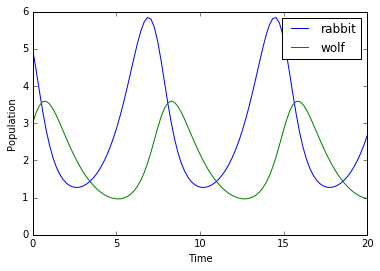

In [8]:
r0 = 5
w0 = 3

a = 1.0
alpha = .5

c = .75
gamma = .25

t_f = 20
y0 = [r0, w0]

t = np.linspace(0, t_f, 5*t_f)
y = np.zeros((len(t), len(y0)))
y[0,:] = y0


## PROBLEM 1
def predator_prey(t, y, a, alpha, c, gamma):
    '''
    Parameters:
    t: time variable
    y: an array of length len(y0) representing current wolf and rabbit 
        populations at time t.
    a, alpha, c, gamma: growth parameters. These are keyword arguments
        and can be of any length
    
    Return:
    Return a list corresponding to the Predator-Prey model.
    '''
    r_t, w_t = y[0], y[1]
    return [r_t*(a - alpha*w_t), w_t*(-c + gamma*r_t)]

predator_prey_ode = lambda t, y: predator_prey(t,y,a,alpha,c,gamma)
p_p_solver = ode(predator_prey_ode).set_integrator('dopri5')
p_p_solver.set_initial_value(y0, 0)

for j in range(1, len(t)):
    y[j,:] = p_p_solver.integrate((t[j]))
    
plt.plot(t, y[:,0], label = 'rabbit')
plt.plot(t, y[:,1], label = 'wolf')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()    

## Problem 2

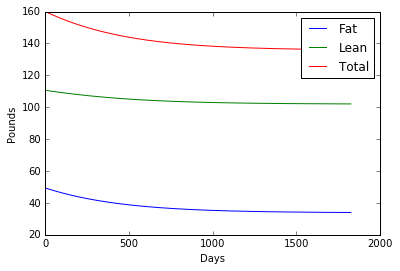

In [23]:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = .14
beta_TEF = .1
K = 0

def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F, p * EB / rho_L])

def fat_mass(BW, age, H, sex):
    '''
    Parameters:
    BW: Body weight in kilograms
    age: 
    H: heigh in meters
    gender: 'male' or 'female'
    
    Returns:
    F: fat mass
    
    '''
    BMI = BW / H**2
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + .14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + .14 * age) / 100
    
p2kg = lambda p: p*.453592
kg2p = lambda k: k*2.20462
m2inch = lambda m: m*39.3701
inch2m = lambda f,i: (f*12 + i) * .0254

age = 38
sex = 'female'
weight = 160
h_feet = 5
h_inch = 8

EI = 2025
PAL = 1.5

F_0 = fat_mass(p2kg(weight), age, inch2m(h_feet,h_inch), sex)
L_0 = p2kg(weight) - F_0
y_0 = [F_0, L_0]

days = 5*365

t = np.linspace(0, days, days)
y = np.zeros((len(t), len(y_0)))
y[0,:] = y_0

weightloss_ode = lambda t, y: weight_odesystem(t, y, EI, PAL)
wl_solver = ode(weightloss_ode).set_integrator('dopri5')
wl_solver.set_initial_value(y_0, 0)

for j in range(1,len(t)):
    y[j,:] = wl_solver.integrate((t[j]))
    
plt.plot(t, kg2p(y[:,0]), label = 'Fat')
plt.plot(t, kg2p(y[:,1]), label = 'Lean')
plt.plot(t, kg2p(y[:,0] + y[:,1]), label = 'Total')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Pounds')
plt.show()    

## Problem 3

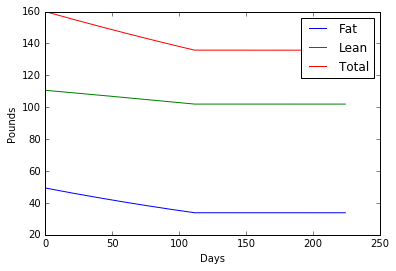

In [24]:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = .14
beta_TEF = .1
K = 0

def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F, p * EB / rho_L])

def fat_mass(BW, age, H, sex):
    '''
    Parameters:
    BW: Body weight in kilograms
    age: 
    H: heigh in meters
    gender: 'male' or 'female'
    
    Returns:
    F: fat mass
    
    '''
    BMI = BW / H**2
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + .14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + .14 * age) / 100
    
p2kg = lambda p: p*.453592
kg2p = lambda k: k*2.20462
m2inch = lambda m: m*39.3701
inch2m = lambda f,i: (f*12 + i) * .0254

age = 38
sex = 'female'
weight = 160
h_feet = 5
h_inch = 8

EI = [1600, 2025]
PAL = [1.7, 1.5]

F_0 = fat_mass(p2kg(weight), age, inch2m(h_feet,h_inch), sex)
L_0 = p2kg(weight) - F_0
y_0 = [F_0, L_0]

days = 7*16

t = np.linspace(0, days, days)
y = np.zeros((len(t), len(y_0)))
y[0,:] = y_0

weightloss_ode = lambda t, y: weight_odesystem(t, y, EI[0], PAL[0])
wl_solver = ode(weightloss_ode).set_integrator('dopri5')
wl_solver.set_initial_value(y_0, 0)

for j in range(1,len(t)):
    y[j,:] = wl_solver.integrate((t[j]))
    
z_0 = [y[-1,0], y[-1,1]]
z = np.zeros((len(t), len(z_0)))
z[0,:] = z_0

weightloss_ode = lambda t, y: weight_odesystem(t, y, EI[1], PAL[1])
wl_solver = ode(weightloss_ode).set_integrator('dopri5')
wl_solver.set_initial_value(z_0, 0)

for j in range(1,len(t)):
    z[j,:] = wl_solver.integrate((t[j]))
    
t = np.linspace(0, days*2, days*2)
plt.plot(t, kg2p(np.concatenate((y[:,0],z[:,0]))), label = 'Fat')
plt.plot(t, kg2p(np.concatenate((y[:,1], z[:,1]))), label = 'Lean')
plt.plot(t, kg2p(np.concatenate((y[:,0] + y[:,1], z[:,0] + z[:,1]))), label = 'Total')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Pounds')
plt.show()    

## Problem 4



Initial Conditions: [ 0.5   0.75]


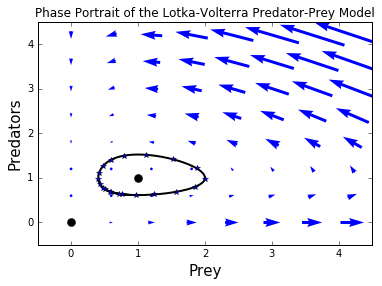



Initial Conditions: [ 0.0625  0.75  ]


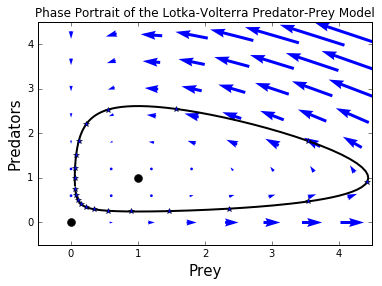



Initial Conditions: [ 0.025  0.75 ]


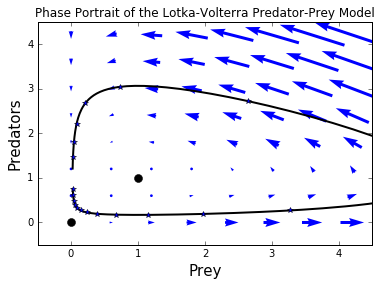

In [28]:
from scipy.integrate import odeint

a,b = 0., 13.
alpha = 1./3
dim = 2
# y0 = np.array([1/2., 1/3.])

def Lotka_Volterra(y,x):
    return np.array([y[0] * (1. - y[1]), alpha * y[1] * (y[0] - 1.)])

y = np.array([[1/2., 3/4.],
              [1/16., 3/4.], 
              [1/40., 3/4.]])
for y0 in y:
    subintervals = 200
    print("\n\nInitial Conditions: {0}".format(str(y0)))
    # Unsing the built in ode solver
    Y = odeint(Lotka_Volterra, y0, np.linspace(a,b,subintervals))

    # Plot the direction field
    Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
    U, V = Lotka_Volterra((Y1,Y2), 0)
    Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots', width=3.)

    #Plot the 2 Equilibrium points
    plt.plot(1,1, 'ok', markersize=8)
    plt.plot(0,0, 'ok', markersize=8)

    # Plot the solution in phase space
    plt.plot(Y[:, 0], Y[:, 1], '-k', linewidth = 2.0)
    plt.plot(Y[::10,0], Y[::10, 1], '*b')

    plt.axis([-.5, 4.5, -.5, 4.5])
    plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
    plt.xlabel('Prey', fontsize=15)
    plt.ylabel('Predators', fontsize=15)
    plt.show()

## Problem 5



Alpha: 1.0
Beta: 0.3
Initial Conditions: [ 0.33333333  0.33333333]


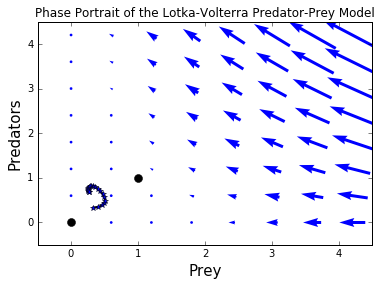



Alpha: 1.0
Beta: 0.3
Initial Conditions: [ 0.5  0.2]


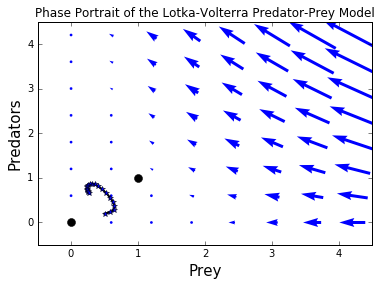



Alpha: 1.0
Beta: 1.1
Initial Conditions: [ 0.33333333  0.33333333]


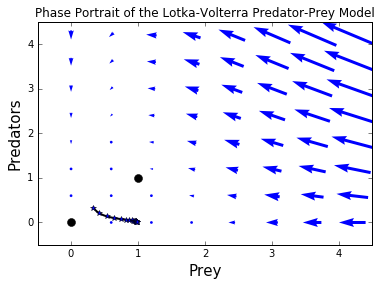



Alpha: 1.0
Beta: 1.1
Initial Conditions: [ 0.5  0.2]


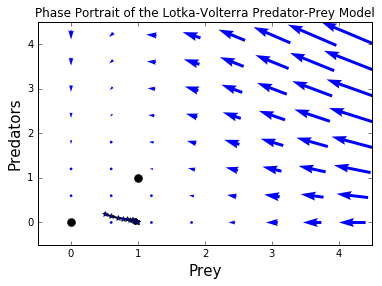

In [29]:
from scipy.integrate import odeint

parameters = np.array([[1,.3],[1,1.1]])
for parameter in parameters:
    a,b = 0., 13.
    alpha, beta = parameter
    dim = 2
    # y0 = np.array([1/2., 1/3.])

    def Lotka_Volterra(y,x):
        return np.array([y[0] * (1. - y[0] - y[1]), alpha * y[1] * (y[0] - beta)])

    y = np.array([[1/3., 1/3.],
                  [1/2., 1/5.]])
    for y0 in y:
        subintervals = 200
        print("\n\nAlpha: {0}\nBeta: {1}".format(parameter[0], parameter[1]))
        print("Initial Conditions: {0}".format(str(y0)))
        # Unsing the built in ode solver
        Y = odeint(Lotka_Volterra, y0, np.linspace(a,b,subintervals))

        # Plot the direction field
        Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
        U, V = Lotka_Volterra((Y1,Y2), 0)
        Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots', width=3.)

        #Plot the 2 Equilibrium points
        plt.plot(1,1, 'ok', markersize=8)
        plt.plot(0,0, 'ok', markersize=8)

        # Plot the solution in phase space
        plt.plot(Y[:, 0], Y[:, 1], '-k', linewidth = 2.0)
        plt.plot(Y[::10,0], Y[::10, 1], '*b')

        plt.axis([-.5, 4.5, -.5, 4.5])
        plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
        plt.xlabel('Prey', fontsize=15)
        plt.ylabel('Predators', fontsize=15)
        plt.show()